# GMM Anomaly Detection in contextual tokens

In [1]:
import sys
sys.path.append('../')

import pickle
import random
import numpy as np
import matplotlib.pyplot as plt

import src.sentpair_generator
import src.anomaly_model

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Pick random subset of sentences

In [2]:
with open('../data/bnc.pkl', 'rb') as f:
  bnc_sentences = pickle.load(f)

random.seed(12345)
bnc_sentences = random.sample(bnc_sentences, 1000)

## Plot of GMM score at each layer and word

In [13]:
model = src.anomaly_model.AnomalyModel(bnc_sentences)

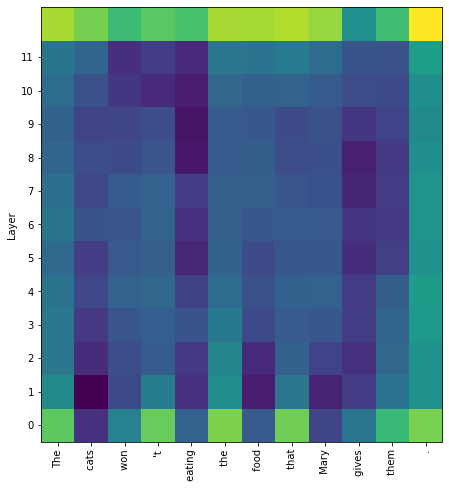

In [18]:
def all_layer_scores(sent):
  tokens, all_layer = model.gmm_score(sent)
  plt.figure(figsize=(8, 8))
  plt.imshow(all_layer, origin='lower')
  plt.xticks(range(len(tokens)), tokens, rotation='vertical')
  plt.yticks(range(12), range(12))
  plt.ylabel('Layer')
  plt.show()

all_layer_scores("The cats won't eating the food that Mary gives them.")

## Evaluate on Osterhout / Nicol data

In [15]:
sentgen = src.sentpair_generator.SentPairGenerator()

In [22]:
for layer in range(13):
  syn_score = model.eval_sent_pairs(sentgen.get_osterhout_nicol(anomaly_type='syntactic'), layer)
  sem_score = model.eval_sent_pairs(sentgen.get_osterhout_nicol(anomaly_type='semantic'), layer)
  print(layer, syn_score, sem_score)

0 0.5222222222222223 0.5333333333333333
1 0.6111111111111112 0.4
2 0.7888888888888889 0.4222222222222222
3 0.9222222222222223 0.4444444444444444
4 0.9777777777777777 0.6111111111111112
5 0.9777777777777777 0.5666666666666667
6 0.9888888888888889 0.5777777777777777
7 0.9888888888888889 0.6666666666666666
8 0.9777777777777777 0.6333333333333333
9 0.9888888888888889 0.7333333333333333
10 0.9777777777777777 0.8444444444444444
11 0.9888888888888889 0.8666666666666667
12 0.9 0.7
